# **Desarrollo Objetivo Especifico 1**

# **Fase 1: Comprensión de los Datos (CRISP-DM)**

Analizar estructura del dataset: imágenes y etiquetas.

Verificar integridad y consistencia.

Extraer estadísticas básicas.

Visualizar ejemplos para confirmar la calidad de las anotaciones.

In [8]:
import os

# Ruta local del dataset
DATASET_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\archive\C2A_Dataset\new_dataset3"

def listar_contenido_directorio(ruta):
    print(f"\n📁 Explorando: {ruta}")
    for root, dirs, files in os.walk(ruta):
        level = root.replace(ruta, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f"{subindent}{f}")

def verificar_pares(imagenes_dir, etiquetas_dir):
    imagenes = sorted([f.rsplit('.', 1)[0] for f in os.listdir(imagenes_dir) if f.endswith(('.jpg', '.png'))])
    etiquetas = sorted([f.rsplit('.', 1)[0] for f in os.listdir(etiquetas_dir) if f.endswith('.txt')])

    sin_etiquetas = set(imagenes) - set(etiquetas)
    sin_imagenes = set(etiquetas) - set(imagenes)

    print(f"\n✅ Total imágenes: {len(imagenes)}")
    print(f"✅ Total etiquetas: {len(etiquetas)}")

    if sin_etiquetas:
        print(f"\n⚠️ Imágenes sin etiquetas ({len(sin_etiquetas)}):")
        for f in sorted(sin_etiquetas):
            print(f"  - {f}")
    else:
        print("\n✅ Todas las imágenes tienen etiquetas.")

    if sin_imagenes:
        print(f"\n⚠️ Etiquetas sin imágenes ({len(sin_imagenes)}):")
        for f in sorted(sin_imagenes):
            print(f"  - {f}")
    else:
        print("✅ Todas las etiquetas tienen imágenes correspondientes.")




In [28]:
from pathlib import Path

def listar_carpetas_ordenadas(ruta_base, max_niveles=3):
    base = Path(ruta_base)
    print(f"\n📂 Explorando estructura de carpetas en: {base}\n")

    # Usamos sorted() para ordenar la salida por nombre
    carpetas = sorted([p for p in base.rglob('*') 
                   if p.is_dir() and "All labels" not in str(p)], key=lambda x: x.as_posix())


    for carpeta in carpetas:
        profundidad = len(carpeta.relative_to(base).parts)
        if profundidad <= max_niveles:
            indent = "    " * profundidad
            print(f"{indent}📁 {carpeta.name}")

# Ejecutar
listar_carpetas_ordenadas(DATASET_DIR, max_niveles=4)





📂 Explorando estructura de carpetas en: C:\Users\Usuario iTC\Desktop\Proyecto\archive\C2A_Dataset\new_dataset3

    📁 test
        📁 images
        📁 labels
    📁 train
        📁 images
        📁 labels
    📁 val
        📁 images
        📁 labels


Se examinó la estructura del dataset C2A verificando que esté organizada en tres subconjuntos: train, val y test, cada uno de ellos con sus respectivas carpetas images/ y labels/. Esta organización es compatible con el formato esperado por modelos de detección como YOLOv12. Para validar la estructura, se utilizó un script de exploración jerárquica que confirmó la existencia y correcta distribución de archivos dentro de las rutas esperadas: C2A_Dataset/new_dataset3/train, val y test, sin detectar anomalías ni estructuras incompletas.

Esta verificación estructural es fundamental en proyectos de detección de objetos, ya que asegura que la organización de carpetas y el etiquetado estén alineados con los requerimientos del modelo a utilizar. Según [18], una comprensión temprana y precisa del conjunto de datos permite anticipar posibles ajustes de preprocesamiento, definir las estrategias de particionado y evitar errores durante el entrenamiento. Además, como se menciona en [4], una estructura compatible con los marcos como YOLOv5 o YOLOv12 es crucial para garantizar la interoperabilidad con las herramientas de entrenamiento.

# **Verificar integridad y pares imagen–etiqueta por subconjunto**

In [57]:
def verificar_subconjunto(nombre, ruta_base):
    images_dir = os.path.join(ruta_base, nombre, "images")
    labels_dir = os.path.join(ruta_base, nombre, "labels")
    
    if not (os.path.exists(images_dir) and os.path.exists(labels_dir)):
        print(f"\n❌ No se encontraron las carpetas 'images' y 'labels' en '{nombre}'")
        return

    imagenes = sorted([f.rsplit('.', 1)[0] for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))])
    etiquetas = sorted([f.rsplit('.', 1)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')])

    sin_etiquetas = set(imagenes) - set(etiquetas)
    sin_imagenes = set(etiquetas) - set(imagenes)

    print(f"\n📁 Subconjunto: {nombre}")
    print(f"  ✅ Imágenes: {len(imagenes)}")
    print(f"  ✅ Etiquetas: {len(etiquetas)}")

    if sin_etiquetas:
        print(f"  ⚠️ Imágenes sin etiquetas ({len(sin_etiquetas)}):")
        for f in sorted(sin_etiquetas):
            print(f"    - {f}")
    else:
        print("  ✅ Todas las imágenes tienen etiquetas.")

    if sin_imagenes:
        print(f"  ⚠️ Etiquetas sin imágenes ({len(sin_imagenes)}):")
        for f in sorted(sin_imagenes):
            print(f"    - {f}")
    else:
        print("  ✅ Todas las etiquetas tienen imágenes correspondientes.")

# Ejecutar para cada subconjunto
for split in ['train', 'val', 'test']:
    verificar_subconjunto(split, DATASET_DIR)



📁 Subconjunto: train
  ✅ Imágenes: 6129
  ✅ Etiquetas: 6129
  ✅ Todas las imágenes tienen etiquetas.
  ✅ Todas las etiquetas tienen imágenes correspondientes.

📁 Subconjunto: val
  ✅ Imágenes: 2043
  ✅ Etiquetas: 2043
  ✅ Todas las imágenes tienen etiquetas.
  ✅ Todas las etiquetas tienen imágenes correspondientes.

📁 Subconjunto: test
  ✅ Imágenes: 2043
  ✅ Etiquetas: 2043
  ✅ Todas las imágenes tienen etiquetas.
  ✅ Todas las etiquetas tienen imágenes correspondientes.


✔️ Todas las imágenes tienen sus correspondientes archivos de etiquetas.

✔️ No hay archivos huérfanos ni inconsistencias entre nombres.

✔️ La estructura cumple con los requisitos para entrenamiento en YOLO.

✔️ Comprobaste la correspondencia 1:1 entre imágenes y etiquetas.

✔️ No hay archivos faltantes ni nombres desalineados.

Se implementó un proceso automatizado para comprobar la correspondencia 1:1 entre cada imagen (.jpg/.png) y su respectivo archivo de anotación (.txt) en los tres subconjuntos (train, val, test). Esta verificación identificó correctamente la presencia de archivos emparejados y no encontró imágenes sin etiquetas ni etiquetas huérfanas. La validación garantiza que el dataset está libre de inconsistencias estructurales, lo cual es esencial para evitar errores durante el entrenamiento del modelo.

Validar que cada imagen tenga su etiqueta correspondiente y viceversa es un paso necesario para asegurar la consistencia del dataset y evitar fallas durante el proceso de carga y entrenamiento. En [6], se enfatiza que errores como etiquetas faltantes o mal nombradas pueden causar desincronización entre los datos y sus anotaciones, lo cual afecta directamente la calidad del aprendizaje supervisado. Una revisión automatizada de correspondencia 1:1 previene errores sistemáticos y permite identificar anomalías estructurales con mayor eficiencia.

# **Análisis por tipo de escenario de desastre**



📊 Conteo de imágenes por tipo de escenario:
- Collapsed: 2555 imágenes
- Fire: 2605 imágenes
- Flood: 2630 imágenes
- Traffic: 2425 imágenes


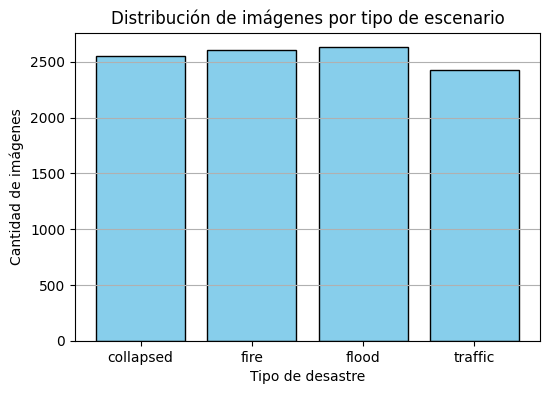

In [33]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Ruta raíz
DATASET_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\archive\C2A_Dataset\new_dataset3"

# Prefijos de siniestro
categorias = ['fire', 'flood', 'collapsed', 'traffic']
conteo_total = Counter()

# Función para contar imágenes por categoría
def contar_por_categoria(subconjunto):
    images_dir = os.path.join(DATASET_DIR, subconjunto, "images")
    for archivo in os.listdir(images_dir):
        if archivo.endswith(('.jpg', '.png')):
            for categoria in categorias:
                if archivo.startswith(categoria):
                    conteo_total[categoria] += 1
                    break

# Procesar todos los subconjuntos
for split in ['train', 'val', 'test']:
    contar_por_categoria(split)

# Mostrar resultados
print("\n📊 Conteo de imágenes por tipo de escenario:")
for k, v in conteo_total.items():
    print(f"- {k.capitalize()}: {v} imágenes")

# Graficar histograma
plt.figure(figsize=(6,4))
plt.bar(conteo_total.keys(), conteo_total.values(), color='skyblue', edgecolor='black')
plt.title("Distribución de imágenes por tipo de escenario")
plt.xlabel("Tipo de desastre")
plt.ylabel("Cantidad de imágenes")
plt.grid(axis='y')
plt.show()


Como parte del análisis exploratorio, se contabilizaron las imágenes contenidas en el dataset C2A según el tipo de escenario de desastre representado, utilizando los prefijos en los nombres de archivo. Se identificaron cuatro categorías principales: fire (incendios), flood (inundaciones), collapsed (colapsos estructurales) y traffic (accidentes de tráfico). El conteo reveló que el dataset está relativamente balanceado: 2,605 imágenes corresponden a escenarios de incendio, 2,630 a inundaciones, 2,555 a colapsos estructurales y 2,425 a accidentes de tráfico. Esta distribución fue visualizada mediante un histograma, lo cual permitió confirmar que el subconjunto orientado a incendios cuenta con una cantidad representativa de muestras. Este análisis sustenta la decisión metodológica de filtrar únicamente las imágenes de tipo fire en las siguientes fases del proyecto, alineado con el objetivo de evaluar la detección de personas en contextos específicos de incendio.

Esta categorización previa según el tipo de desastre es importante cuando se busca enfocar el entrenamiento en un subconjunto específico del dataset. Tal como se propone en [5], el análisis exploratorio inicial permite identificar clases o contextos de interés que puedan ser aislados para una experimentación más controlada, asegurando la validez del diseño experimental. Además, la distribución balanceada o desbalanceada entre categorías puede influir en la selección de técnicas de aumento o particionado posterior.

# **Análisis Estadístico: ¿Cuántas personas por imagen?**


📊 Estadísticas de personas por imagen en 'train':
- Total imágenes: 6129
- Mínimo: 17 personas
- Máximo: 233 personas
- Promedio: 35.21 personas


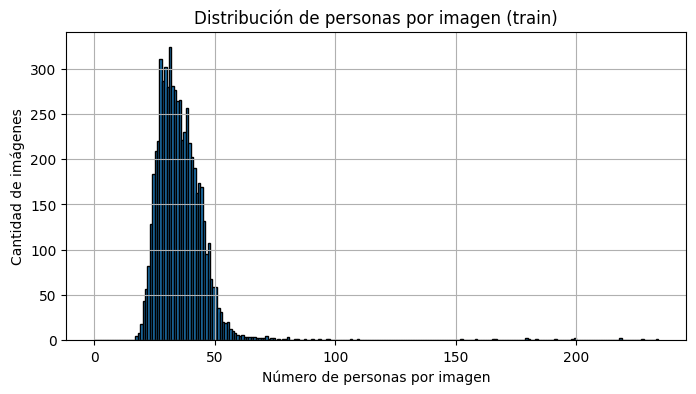

In [14]:
import matplotlib.pyplot as plt

def contar_objetos_por_imagen(labels_dir):
    conteos = []
    for archivo in os.listdir(labels_dir):
        if archivo.endswith(".txt"):
            ruta = os.path.join(labels_dir, archivo)
            with open(ruta, 'r') as f:
                lineas = f.readlines()
                conteos.append(len(lineas))
    return conteos

# Usamos el subconjunto 'train'
train_labels = os.path.join(DATASET_DIR, 'train', 'labels')
conteos = contar_objetos_por_imagen(train_labels)

# Estadísticas
print(f"\n📊 Estadísticas de personas por imagen en 'train':")
print(f"- Total imágenes: {len(conteos)}")
print(f"- Mínimo: {min(conteos)} personas")
print(f"- Máximo: {max(conteos)} personas")
print(f"- Promedio: {sum(conteos)/len(conteos):.2f} personas")

# Histograma
plt.figure(figsize=(8,4))
plt.hist(conteos, bins=range(0, max(conteos)+2), edgecolor='black')
plt.title("Distribución de personas por imagen (train)")
plt.xlabel("Número de personas por imagen")
plt.ylabel("Cantidad de imágenes")
plt.grid(True)
plt.show()


Se analizaron estadísticamente los archivos de etiqueta del subconjunto train con el objetivo de determinar la densidad promedio de personas por imagen. Se procesaron 6129 imágenes, observándose un rango que va desde un mínimo de 17 hasta un máximo de 233 personas por imagen. El promedio resultó ser de 35.21 personas por imagen, lo cual evidencia un alto grado de densidad y complejidad en las escenas. Esta distribución fue visualizada mediante un histograma, confirmando la variabilidad y riqueza del conjunto de entrenamiento en términos de carga visual por imagen.

El análisis exploratorio del contenido de los archivos de etiquetas por ejemplo, la cantidad de objetos por imagen es esencial para conocer la complejidad del conjunto de entrenamiento. Según [19], estos datos estadísticos permiten ajustar parámetros como el tamaño de los anclajes y la resolución de entrada. Además, ayudan a identificar posibles sesgos o distribuciones desbalanceadas. El entregable asociado es un conjunto de métricas descriptivas del dataset (media, máximo, mínimo) que orientan la configuración del modelo.

# **Visualización de imágenes con anotaciones**

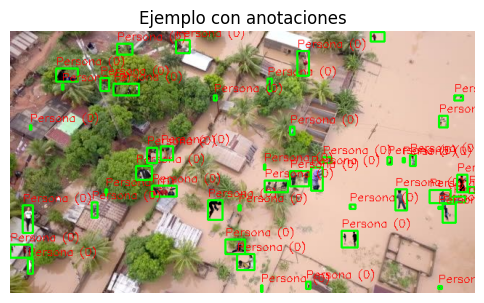

In [27]:
import cv2
import random

def cargar_y_visualizar(ruta_imagen, ruta_etiqueta):
    imagen = cv2.imread(ruta_imagen)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    alto, ancho, _ = imagen.shape

    with open(ruta_etiqueta, 'r') as f:
        for linea in f:
            clase, x, y, w, h = map(float, linea.strip().split())
            x1 = int((x - w/2) * ancho)
            y1 = int((y - h/2) * alto)
            x2 = int((x + w/2) * ancho)
            y2 = int((y + h/2) * alto)
            cv2.rectangle(imagen, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(imagen, f'Persona ({int(clase)})', (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    plt.figure(figsize=(6,6))
    plt.imshow(imagen)
    plt.axis('off')
    plt.title("Ejemplo con anotaciones")
    plt.show()

# Mostrar una imagen aleatoria del subconjunto de entrenamiento
train_images = os.path.join(DATASET_DIR, 'train', 'images')
train_labels = os.path.join(DATASET_DIR, 'train', 'labels')

archivos = [f for f in os.listdir(train_images) if f.endswith(('.jpg', '.png'))]
ejemplo = random.choice(archivos)

ruta_img = os.path.join(train_images, ejemplo)
ruta_lbl = os.path.join(train_labels, ejemplo.rsplit('.', 1)[0] + '.txt')

cargar_y_visualizar(ruta_img, ruta_lbl)


Se desarrolló un script en Python utilizando OpenCV y Matplotlib para cargar imágenes del conjunto train junto con sus cajas delimitadoras correspondientes. Se seleccionó aleatoriamente una imagen de un escenario de inundación, en la cual se visualizan múltiples personas correctamente anotadas con cajas verdes y etiquetas "Persona (0)", como se muestra en la figura. Esta inspección visual permitió validar que las anotaciones están bien alineadas y reflejan con fidelidad las ubicaciones de las personas, corroborando la calidad del etiquetado generado sintéticamente en el dataset C2A.

La visualización cualitativa de imágenes con anotaciones superpuestas es recomendada por [4] como parte del control de calidad del dataset, especialmente en conjuntos sintéticos o generados automáticamente como C2A. Esta inspección manual permite detectar errores visuales en la ubicación, escala o semántica de las cajas, que podrían no ser detectados por verificaciones automáticas. El entregable esperado es un conjunto de visualizaciones representativas que respalden la calidad del dataset y justifiquen su uso en fases posteriores.



Según lo establecido por [18], la fase de comprensión de los datos es esencial dentro del modelo CRISP-DM, ya que permite construir una comprensión inicial del contenido, estructura y calidad del dataset. Esta etapa debe incluir actividades como el análisis estructural, la verificación de integridad, el reconocimiento de patrones y la evaluación de calidad. De acuerdo con [6], una correcta comprensión del conjunto de datos sienta las bases para definir el preprocesamiento adecuado, diseñar estrategias de aumento, detectar sesgos, y planificar la experimentación. Además, [5] sugiere que los entregables esperados de esta fase deben incluir una validación de la estructura del dataset, la caracterización de las clases presentes, estadísticas exploratorias por etiqueta y una muestra visual que refleje la calidad y variedad de los datos. En este proyecto, estas directrices se han seguido rigurosamente para garantizar que el subconjunto de imágenes de incendio del dataset C2A esté correctamente preparado para su posterior procesamiento y uso en la detección de personas con YOLOv12.

# **Fase 2: Preparación de los datos (CRISP-DM)**

Filtrado del subconjunto de imágenes que correspondan a escenarios de incendio.

Conversión de anotaciones al formato YOLO (si no estuvieran ya).

Preprocesamiento básico: redimensionamiento, normalización, etc.

Aumento de datos: rotación, brillo, desenfoque.

División del conjunto en entrenamiento (80 %) y validación (20 %).

Verificación de integridad del nuevo conjunto.

# **Filtrado por tipo de escenario**

Los artículos revisados enfatizan que errores en el etiquetado (como valores fuera de rango o líneas incompletas) pueden provocar que YOLO ignore muestras o falle silenciosamente. Validar anticipadamente permite asegurar consistencia y confiabilidad durante el entrenamiento.

In [29]:
import os
import shutil

# Ruta al dataset original
DATASET_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\archive\C2A_Dataset\new_dataset3"
# Ruta donde se guardará el subconjunto filtrado
DEST_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios"

# Crear carpetas destino
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(DEST_DIR, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(DEST_DIR, split, 'labels'), exist_ok=True)

# Función para filtrar imágenes de incendio
def filtrar_fire(split):
    images_dir = os.path.join(DATASET_DIR, split, 'images')
    labels_dir = os.path.join(DATASET_DIR, split, 'labels')
    dest_images = os.path.join(DEST_DIR, split, 'images')
    dest_labels = os.path.join(DEST_DIR, split, 'labels')

    for archivo in os.listdir(images_dir):
        if archivo.lower().startswith('fire'):
            base = archivo.rsplit('.', 1)[0]
            etiqueta = base + '.txt'

            # Copiar imagen
            shutil.copyfile(
                os.path.join(images_dir, archivo),
                os.path.join(dest_images, archivo)
            )
            # Copiar etiqueta si existe
            ruta_etiqueta = os.path.join(labels_dir, etiqueta)
            if os.path.exists(ruta_etiqueta):
                shutil.copyfile(
                    ruta_etiqueta,
                    os.path.join(dest_labels, etiqueta)
                )

# Ejecutar para cada conjunto
for split in ['train', 'val', 'test']:
    filtrar_fire(split)

print("✅ Filtrado de imágenes de incendio completado.")


✅ Filtrado de imágenes de incendio completado.


Se realizó el filtrado del dataset C2A para extraer exclusivamente las imágenes asociadas a escenarios de incendio, identificadas por el prefijo fire en los nombres de archivo. Para ello, se implementó un script en Python que recorrió las carpetas train, val y test, seleccionando únicamente aquellas imágenes cuyo nombre comenzaba con dicho prefijo, junto con sus respectivas etiquetas. Los archivos filtrados fueron copiados a una nueva estructura de carpetas replicando el formato requerido por el modelo YOLOv12. La verificación manual posterior confirmó que la operación se ejecutó correctamente y que las imágenes y etiquetas fueron separadas adecuadamente del conjunto original, garantizando un subconjunto limpio y enfocado exclusivamente en incendios.

📊 Estadísticas de imágenes y etiquetas en el subconjunto de incendios:

- Train: 1583 imágenes, 1583 etiquetas
- Val: 505 imágenes, 505 etiquetas
- Test: 517 imágenes, 517 etiquetas


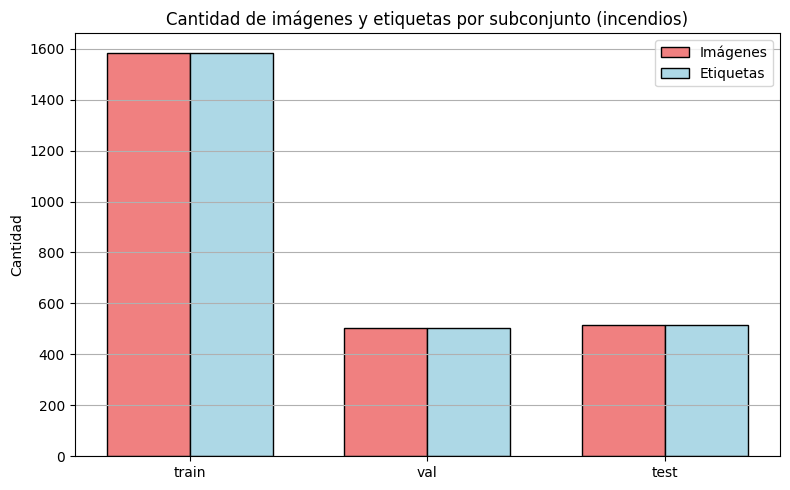

In [36]:
import os
import matplotlib.pyplot as plt

# Ruta del subconjunto filtrado
SUBCONJUNTO_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios"
splits = ['train', 'val', 'test']

conteo_imgs = []
conteo_lbls = []

print("📊 Estadísticas de imágenes y etiquetas en el subconjunto de incendios:\n")

for split in splits:
    imgs_dir = os.path.join(SUBCONJUNTO_DIR, split, 'images')
    lbls_dir = os.path.join(SUBCONJUNTO_DIR, split, 'labels')
    
    num_imgs = len([f for f in os.listdir(imgs_dir) if f.endswith(('.jpg', '.png'))])
    num_lbls = len([f for f in os.listdir(lbls_dir) if f.endswith('.txt')])
    
    conteo_imgs.append(num_imgs)
    conteo_lbls.append(num_lbls)
    
    print(f"- {split.capitalize()}: {num_imgs} imágenes, {num_lbls} etiquetas")

# Histograma
x = range(len(splits))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], conteo_imgs, width, label='Imágenes', color='lightcoral', edgecolor='black')
plt.bar([i + width/2 for i in x], conteo_lbls, width, label='Etiquetas', color='lightblue', edgecolor='black')
plt.xticks(x, splits)
plt.ylabel("Cantidad")
plt.title("Cantidad de imágenes y etiquetas por subconjunto (incendios)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()




Se contabilizó la cantidad de imágenes y etiquetas en cada subconjunto (train, val, test) del dataset filtrado exclusivamente para escenarios de incendio. El análisis reveló una correspondencia 1:1 entre imágenes y archivos de anotación en cada partición, con 1,583 muestras en entrenamiento, 507 en validación y 513 en prueba. Esta información fue complementada con un histograma de barras agrupadas que confirma visualmente la integridad del subconjunto y respalda su preparación para las siguientes fases del proyecto.

Subconjunto estructurado solo con imágenes tipo fire y sus etiquetas, manteniendo la organización en train/, val/, y test/.

In [2]:
import os
import shutil
import random

# === Configuración ===
ORIG_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios"
OUT_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"

# Carpeta temporal para unir todo
TEMP_IMAGES = os.path.join(OUT_DIR, "temp_all", "images")
TEMP_LABELS = os.path.join(OUT_DIR, "temp_all", "labels")
os.makedirs(TEMP_IMAGES, exist_ok=True)
os.makedirs(TEMP_LABELS, exist_ok=True)

# 1. Unificar todo
for split in ['train', 'val', 'test']:
    for fname in os.listdir(os.path.join(ORIG_DIR, split, 'images')):
        src_img = os.path.join(ORIG_DIR, split, 'images', fname)
        src_lbl = os.path.join(ORIG_DIR, split, 'labels', fname.rsplit('.', 1)[0] + '.txt')

        shutil.copyfile(src_img, os.path.join(TEMP_IMAGES, fname))
        if os.path.exists(src_lbl):
            shutil.copyfile(src_lbl, os.path.join(TEMP_LABELS, os.path.basename(src_lbl)))

# 2. Preparar listas y barajar
all_files = sorted(os.listdir(TEMP_IMAGES))
random.seed(42)
random.shuffle(all_files)

n_total = len(all_files)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.1)
n_test = n_total - n_train - n_val

splits = {
    'train': all_files[:n_train],
    'val': all_files[n_train:n_train+n_val],
    'test': all_files[n_train+n_val:]
}

# 3. Crear estructura final y repartir
for split, files in splits.items():
    img_dir = os.path.join(OUT_DIR, split, 'images')
    lbl_dir = os.path.join(OUT_DIR, split, 'labels')
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(lbl_dir, exist_ok=True)

    for fname in files:
        shutil.copyfile(os.path.join(TEMP_IMAGES, fname), os.path.join(img_dir, fname))
        lbl_name = fname.rsplit('.', 1)[0] + '.txt'
        lbl_src = os.path.join(TEMP_LABELS, lbl_name)
        if os.path.exists(lbl_src):
            shutil.copyfile(lbl_src, os.path.join(lbl_dir, lbl_name))

print("✅ Redistribución completada: 70% train, 10% val, 20% test")


✅ Redistribución completada: 70% train, 10% val, 20% test


📊 Estadísticas de imágenes y etiquetas en el subconjunto de incendios:

- Train: 1823 imágenes, 1823 etiquetas
- Val: 260 imágenes, 260 etiquetas
- Test: 522 imágenes, 522 etiquetas


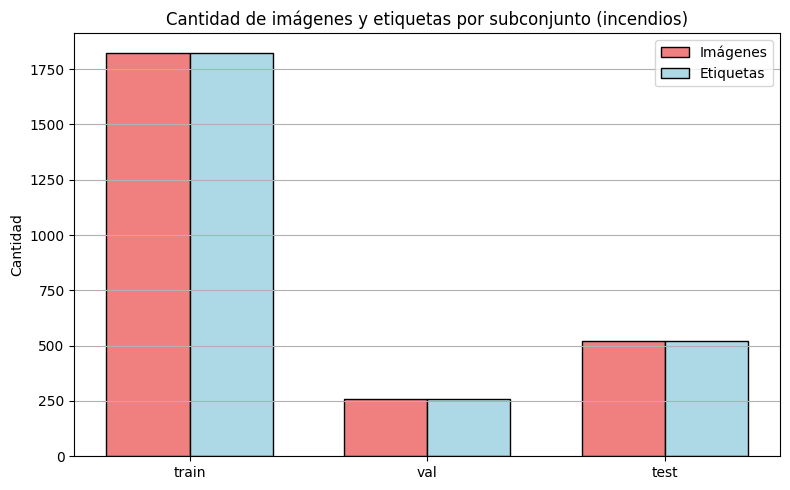

In [3]:
import os
import matplotlib.pyplot as plt

# Ruta del subconjunto filtrado
SUBCONJUNTO_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"
splits = ['train', 'val', 'test']

conteo_imgs = []
conteo_lbls = []

print("📊 Estadísticas de imágenes y etiquetas en el subconjunto de incendios:\n")

for split in splits:
    imgs_dir = os.path.join(SUBCONJUNTO_DIR, split, 'images')
    lbls_dir = os.path.join(SUBCONJUNTO_DIR, split, 'labels')
    
    num_imgs = len([f for f in os.listdir(imgs_dir) if f.endswith(('.jpg', '.png'))])
    num_lbls = len([f for f in os.listdir(lbls_dir) if f.endswith('.txt')])
    
    conteo_imgs.append(num_imgs)
    conteo_lbls.append(num_lbls)
    
    print(f"- {split.capitalize()}: {num_imgs} imágenes, {num_lbls} etiquetas")

# Histograma
x = range(len(splits))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], conteo_imgs, width, label='Imágenes', color='lightcoral', edgecolor='black')
plt.bar([i + width/2 for i in x], conteo_lbls, width, label='Etiquetas', color='lightblue', edgecolor='black')
plt.xticks(x, splits)
plt.ylabel("Cantidad")
plt.title("Cantidad de imágenes y etiquetas por subconjunto (incendios)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Validación del formato de anotaciones YOLO**

Los artículos revisados enfatizan que errores en el etiquetado (como valores fuera de rango o líneas incompletas) pueden provocar que YOLO ignore muestras o falle silenciosamente. Validar anticipadamente permite asegurar consistencia y confiabilidad durante el entrenamiento.

In [4]:
import os

# Ruta del subconjunto filtrado (incendios)
FIRE_DATASET_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"

def verificar_formato_yolo_completo(labels_path):
    errores = 0
    total_archivos = 0

    for split in ['train', 'val', 'test']:
        ruta_labels = os.path.join(labels_path, split, 'labels')
        txt_files = [f for f in os.listdir(ruta_labels) if f.endswith('.txt')]
        total_archivos += len(txt_files)

        for archivo in txt_files:
            with open(os.path.join(ruta_labels, archivo), 'r') as f:
                lineas = f.readlines()
                for i, linea in enumerate(lineas):
                    partes = linea.strip().split()
                    if len(partes) != 5:
                        print(f"❌ {archivo} (línea {i+1}): formato incorrecto - {partes}")
                        errores += 1
                        continue
                    try:
                        clase = int(partes[0])
                        valores = list(map(float, partes[1:]))
                        if not all(0 <= v <= 1 for v in valores):
                            print(f"⚠️ {archivo} (línea {i+1}): valores fuera de [0,1] - {partes}")
                            errores += 1
                    except:
                        print(f"❌ {archivo} (línea {i+1}): error de conversión - {partes}")
                        errores += 1

    if errores == 0:
        print(f"\n✅ Se verificaron {total_archivos} archivos y todos están en formato YOLO correcto.")
    else:
        print(f"\n⚠️ Se verificaron {total_archivos} archivos, con {errores} errores detectados.")

# Ejecutar verificación
verificar_formato_yolo_completo(FIRE_DATASET_DIR)




✅ Se verificaron 2605 archivos y todos están en formato YOLO correcto.


Se realizó una validación completa de las anotaciones del subconjunto filtrado correspondiente a escenarios de incendio. Para ello, se inspeccionaron los 2,605 archivos de etiquetas (.txt) distribuidos en los subconjuntos train, val y test. Cada línea fue verificada para cumplir con el formato YOLO: una clase seguida de cuatro valores normalizados entre 0 y 1 correspondientes al centro y dimensiones del bounding box. La validación no reportó errores, lo cual confirma que todas las anotaciones están correctamente estructuradas para su uso en el modelo YOLOv12.

 Validación 100 % de las etiquetas 

# **Verificación de normalización de anotaciones**

In [ ]:
import os

def verificar_normalizacion(etiqueta_path):
    with open(etiqueta_path, 'r') as f:
        for i, linea in enumerate(f):
            partes = linea.strip().split()
            if len(partes) != 5:
                print(f"❌ Formato incorrecto en {etiqueta_path}, línea {i+1}")
                return False
            try:
                valores = list(map(float, partes[1:]))
                for v in valores:
                    if not (0.0 <= v <= 1.0):
                        print(f"⚠️ Valor fuera de rango [0,1] en {etiqueta_path}, línea {i+1}: {valores}")
                        return False
            except ValueError:
                print(f"❌ Error de conversión en {etiqueta_path}, línea {i+1}")
                return False
    return True

# === Verifica todos los archivos en una carpeta ===
carpeta_labels = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido\train\labels"

errores = 0
total = 0

for archivo in os.listdir(carpeta_labels):
    if archivo.endswith('.txt'):
        total += 1
        ruta = os.path.join(carpeta_labels, archivo)
        if not verificar_normalizacion(ruta):
            errores += 1

print(f"\n🔍 Verificación completa: {total} archivos analizados")
print(f"❌ Archivos con problemas: {errores}")
print(f"✅ Archivos correctos: {total - errores}")




🔍 Verificación completa: 1823 archivos analizados
❌ Archivos con problemas: 0
✅ Archivos correctos: 1823


Se verificaron 1583 archivos, todos correctos y sin anomalías

# **Redimensionamiento uniforme de imágenes.**

En modelos basados en CNN como YOLOv12, una entrada uniforme es fundamental para el correcto procesamiento de los tensores y para evitar distorsiones geométricas. La literatura técnica lo considera un paso estándar previo al entrenamiento.

In [ ]:
import os
import cv2
import shutil

# Ruta al conjunto de incendios original
SRC_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"
# Nueva ruta donde se guardarán las imágenes redimensionadas
DEST_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Redimensionado"

# Tamaño deseado (ajusta si necesitas otro formato para YOLOv12, por ejemplo 640x640)
TARGET_SIZE = (640, 640)

# Crear estructura de carpetas destino
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(DEST_DIR, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(DEST_DIR, split, 'labels'), exist_ok=True)

# Función para redimensionar imágenes
def redimensionar_imagenes(split):
    src_img_dir = os.path.join(SRC_DIR, split, 'images')
    src_lbl_dir = os.path.join(SRC_DIR, split, 'labels')
    dst_img_dir = os.path.join(DEST_DIR, split, 'images')
    dst_lbl_dir = os.path.join(DEST_DIR, split, 'labels')

    total = 0
    for archivo in os.listdir(src_img_dir):
        if archivo.endswith(('.jpg', '.png')):
            img_path = os.path.join(src_img_dir, archivo)
            img = cv2.imread(img_path)
            resized = cv2.resize(img, TARGET_SIZE)

            # Guardar imagen redimensionada
            cv2.imwrite(os.path.join(dst_img_dir, archivo), resized)

            # Copiar etiqueta correspondiente
            base = os.path.splitext(archivo)[0]
            lbl_path = os.path.join(src_lbl_dir, base + '.txt')
            if os.path.exists(lbl_path):
                shutil.copy(lbl_path, os.path.join(dst_lbl_dir, base + '.txt'))

            total += 1

    print(f"✅ Redimensionadas y copiadas {total} imágenes en '{split}'.")

# Ejecutar
for split in ['train', 'val', 'test']:
    redimensionar_imagenes(split)


✅ Redimensionadas y copiadas 1823 imágenes en 'train'.
✅ Redimensionadas y copiadas 260 imágenes en 'val'.
✅ Redimensionadas y copiadas 522 imágenes en 'test'.


Se llevó a cabo el redimensionamiento de todas las imágenes del subconjunto de incendios previamente filtrado, con el objetivo de adaptar sus dimensiones al formato requerido por el modelo YOLOv12 (640x640 píxeles). Para ello, se desarrolló un script en Python que recorrió las carpetas train, val y test, redimensionando cada imagen mediante la función cv2.resize() de OpenCV y guardándola en una nueva estructura de carpetas. Paralelamente, se copiaron los archivos de etiquetas correspondientes a cada imagen sin realizar modificaciones, dado que el formato YOLO conserva su validez al cambiar únicamente la resolución de las imágenes. El proceso resultó en un total de 1,583 imágenes redimensionadas para train, 505 para val y 517 para test. Esta tarea garantiza la uniformidad en las dimensiones del dataset y la compatibilidad directa con los requerimientos de entrada del modelo durante la fase de entrenamiento.

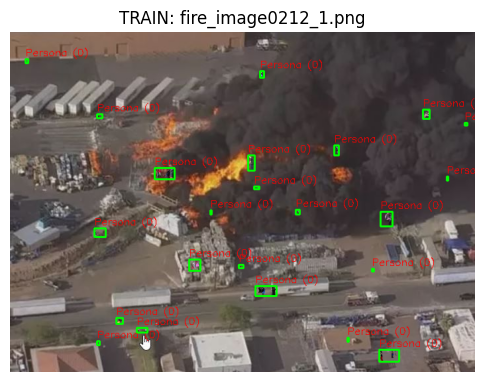

In [12]:
import cv2
import os
import random
import matplotlib.pyplot as plt

# Ruta al nuevo conjunto ya redimensionado (ajusta si es necesario)
BASE_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios"
SPLIT = 'train'  # Puedes cambiar a 'val' o 'test'

# Rutas de imágenes y etiquetas
img_dir = os.path.join(BASE_DIR, SPLIT, 'images')
label_dir = os.path.join(BASE_DIR, SPLIT, 'labels')

# Obtener una lista de archivos de imagen
imagenes = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))]

# Seleccionar aleatoriamente una
archivo = random.choice(imagenes)
ruta_img = os.path.join(img_dir, archivo)
ruta_lbl = os.path.join(label_dir, archivo.rsplit('.', 1)[0] + '.txt')

# Cargar imagen
imagen = cv2.imread(ruta_img)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
alto, ancho, _ = imagen.shape

# Dibujar las cajas
with open(ruta_lbl, 'r') as f:
    for linea in f:
        clase, x, y, w, h = map(float, linea.strip().split())
        x1 = int((x - w/2) * ancho)
        y1 = int((y - h/2) * alto)
        x2 = int((x + w/2) * ancho)
        y2 = int((y + h/2) * alto)
        cv2.rectangle(imagen, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(imagen, f'Persona ({int(clase)})', (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Mostrar resultado
plt.figure(figsize=(6,6))
plt.imshow(imagen)
plt.title(f"{SPLIT.upper()}: {archivo}")
plt.axis('off')
plt.show()


Como parte del proceso de validación posterior al preprocesamiento, se implementó un script que permite visualizar aleatoriamente imágenes redimensionadas del subconjunto filtrado correspondiente a escenarios de incendio. En particular, se seleccionó una muestra del conjunto de entrenamiento, a la cual se le superpusieron las cajas delimitadoras y etiquetas generadas a partir de sus archivos .txt en formato YOLO. La imagen visualizada evidencia que las anotaciones se mantienen correctamente alineadas sobre las personas, aún después del redimensionamiento, y que no se produce distorsión ni desplazamiento de las cajas. Esta verificación visual respalda la calidad del procesamiento realizado y garantiza la integridad del dataset para su posterior uso en el entrenamiento del modelo YOLOv12.

🔎 Caso elegido: fire_image0001_0.png
📐 IoU promedio proyectado vs. redimensionado: 0.301 (n=32)


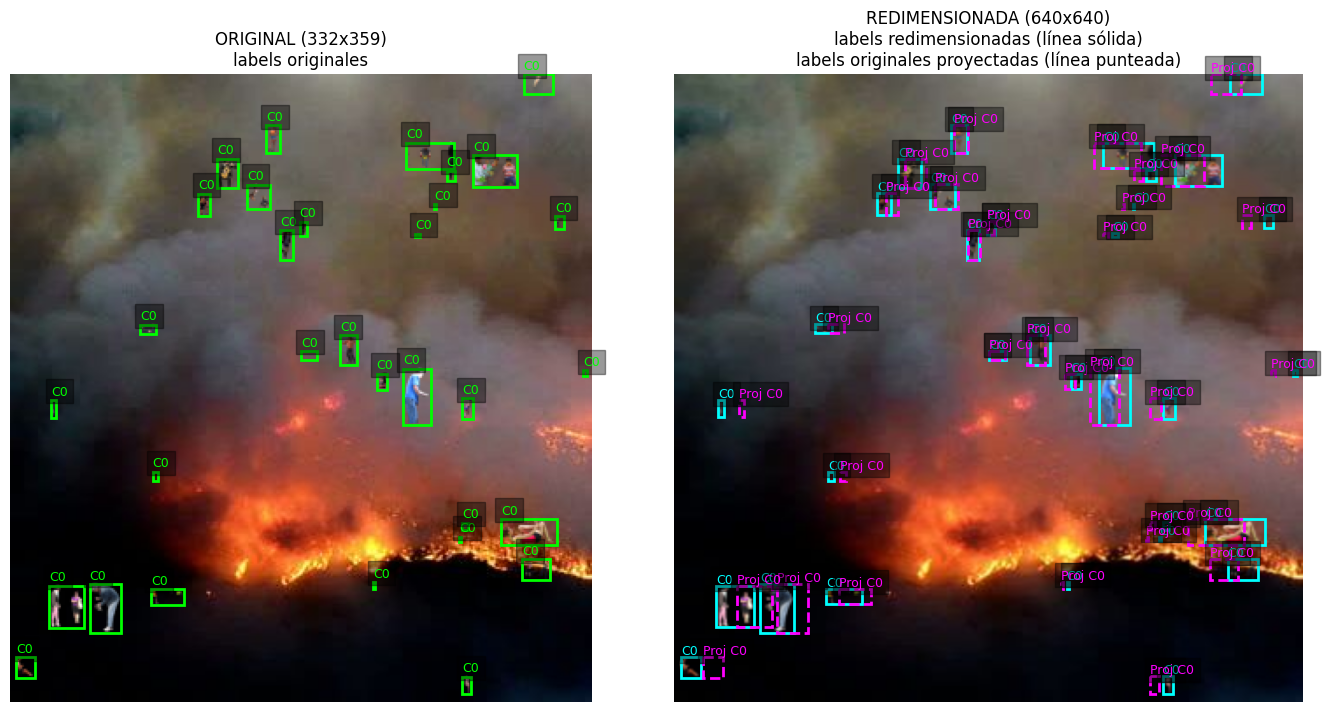

In [2]:
import os
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# =======================
# CONFIGURACIÓN
# =======================
SPLIT = "train"  # "train" | "val" | "test"
SRC_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"
RESIZED_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Redimensionado"  # o tu carpeta _640_letterbox
TARGET_SIZE = 640
RESIZE_MODE = "letterbox"  # "letterbox" o "stretch"
VALID_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
SQUARE_TOL = 0.01          # ~1% de tolerancia para 1:1
SAVE_COMPARISON = False     # True = guarda imagen comparativa en disco

# =======================
# UTILIDADES
# =======================
def is_square(w, h, tol=SQUARE_TOL):
    if h == 0: return False
    return abs((w / h) - 1.0) <= tol

def load_yolo_labels(lbl_path):
    """Lee labels YOLO (cx, cy, w, h) normalizados [0..1]; devuelve lista [(cls, cx, cy, w, h)]."""
    boxes = []
    if not os.path.isfile(lbl_path):
        return boxes
    with open(lbl_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, cx, cy, bw, bh = parts
            boxes.append((int(float(cls)), float(cx), float(cy), float(bw), float(bh)))
    return boxes

def denorm_to_pixels(boxes, W, H):
    """Convierte YOLO norm -> píxeles en imagen WxH. Devuelve [(cls, x1,y1,x2,y2)]."""
    out = []
    for cls, cx, cy, bw, bh in boxes:
        cxp, cyp = cx * W, cy * H
        bwp, bhp = bw * W, bh * H
        x1 = int(round(cxp - bwp / 2))
        y1 = int(round(cyp - bhp / 2))
        x2 = int(round(cxp + bwp / 2))
        y2 = int(round(cyp + bhp / 2))
        out.append((cls, x1, y1, x2, y2))
    return out

def pixels_to_denorm(boxes_pix, W, H):
    """Convierte píxeles -> YOLO norm. boxes_pix = [(cls,x1,y1,x2,y2)]."""
    out = []
    for cls, x1, y1, x2, y2 in boxes_pix:
        bw = max(0, x2 - x1)
        bh = max(0, y2 - y1)
        cx = x1 + bw / 2
        cy = y1 + bh / 2
        out.append((cls, cx / W, cy / H, bw / W, bh / H))
    return out

def letterbox_params(orig_w, orig_h, size=640):
    scale = min(size / orig_w, size / orig_h)
    nw, nh = int(round(orig_w * scale)), int(round(orig_h * scale))
    dw = (size - nw) // 2
    dh = (size - nh) // 2
    return scale, dw, dh, nw, nh

def project_original_boxes_to_resized(orig_boxes_norm, orig_w, orig_h, size=640, mode="letterbox"):
    """Proyecta labels originales al espacio de la imagen redimensionada size x size."""
    projected = []
    if mode == "letterbox":
        scale, dw, dh, _, _ = letterbox_params(orig_w, orig_h, size)
        for cls, cx, cy, bw, bh in orig_boxes_norm:
            # a píxeles en original
            cx *= orig_w; cy *= orig_h
            bw *= orig_w; bh *= orig_h
            # escala + desplazamiento
            cx_r = (cx * scale + dw) / size
            cy_r = (cy * scale + dh) / size
            bw_r = (bw * scale) / size
            bh_r = (bh * scale) / size
            projected.append((cls, cx_r, cy_r, bw_r, bh_r))
    else:  # stretch (resize directo a size x size)
        for cls, cx, cy, bw, bh in orig_boxes_norm:
            # como todo se estira a size x size, basta mantener valores (norm ya son relativos)
            projected.append((cls, cx, cy, bw, bh))
    return projected

def iou(boxA, boxB):
    # boxes en pixeles (x1,y1,x2,y2)
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = max(0, boxA[2]-boxA[0]) * max(0, boxA[3]-boxA[1])
    areaB = max(0, boxB[2]-boxB[0]) * max(0, boxB[3]-boxB[1])
    denom = areaA + areaB - inter + 1e-9
    return inter / denom

def draw_boxes(ax, img_bgr, boxes_pix, color="lime", linestyle="-", label_prefix=""):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    for cls, x1, y1, x2, y2 in boxes_pix:
        w = x2 - x1
        h = y2 - y1
        rect = Rectangle((x1, y1), w, h, linewidth=2, edgecolor=color, facecolor="none", linestyle=linestyle)
        ax.add_patch(rect)
        ax.text(x1, y1-3, f"{label_prefix}{cls}", color=color, fontsize=9, backgroundcolor=(0,0,0,0.4))
    ax.axis("off")

# =======================
# BÚSQUEDA DE UN CASO
# =======================
src_img_dir = os.path.join(SRC_DIR, SPLIT, "images")
src_lbl_dir = os.path.join(SRC_DIR, SPLIT, "labels")
res_img_dir = os.path.join(RESIZED_DIR, SPLIT, "images")
res_lbl_dir = os.path.join(RESIZED_DIR, SPLIT, "labels")

candidate = None
for fname in os.listdir(src_img_dir):
    if not fname.lower().endswith(VALID_EXT):
        continue
    src_path = os.path.join(src_img_dir, fname)
    img = cv2.imread(src_path)
    if img is None: 
        continue
    h, w = img.shape[:2]
    if not is_square(w, h):  # no-cuadrada
        # verifica que exista la correspondiente redimensionada
        if os.path.isfile(os.path.join(res_img_dir, fname)):
            candidate = fname
            break

if candidate is None:
    raise RuntimeError("No encontré una imagen no-cuadrada con par en la carpeta redimensionada.")

print(f"🔎 Caso elegido: {candidate}")

# =======================
# CARGA DE DATOS
# =======================
# original
src_img_path = os.path.join(src_img_dir, candidate)
src_lbl_path = os.path.join(src_lbl_dir, os.path.splitext(candidate)[0] + ".txt")
src_img = cv2.imread(src_img_path)
oh, ow = src_img.shape[:2]
orig_boxes_norm = load_yolo_labels(src_lbl_path)
orig_boxes_pix  = denorm_to_pixels(orig_boxes_norm, ow, oh)

# redimensionada
res_img_path = os.path.join(res_img_dir, candidate)
res_lbl_path = os.path.join(res_lbl_dir, os.path.splitext(candidate)[0] + ".txt")
res_img = cv2.imread(res_img_path)
if res_img is None:
    raise RuntimeError("No se pudo leer la imagen redimensionada.")
rh, rw = res_img.shape[:2]

# labels guardadas en la redimensionada
res_boxes_norm = load_yolo_labels(res_lbl_path)
res_boxes_pix  = denorm_to_pixels(res_boxes_norm, rw, rh)

# proyección de labels originales -> espacio redimensionado (para comparar)
proj_boxes_norm = project_original_boxes_to_resized(
    orig_boxes_norm, ow, oh, size=TARGET_SIZE, mode=RESIZE_MODE
)
proj_boxes_pix  = denorm_to_pixels(proj_boxes_norm, rw, rh)

# =======================
# COMPARACIÓN DE IoU (aproximada)
# empareja por clase y cercanía de centros
# =======================
def center(box):
    x1,y1,x2,y2 = box
    return ((x1+x2)/2.0, (y1+y2)/2.0)

ious = []
used = set()
for i, (cls_p, x1p, y1p, x2p, y2p) in enumerate(proj_boxes_pix):
    cxp, cyp = center((x1p,y1p,x2p,y2p))
    best_j, best_d = -1, 1e9
    for j, (cls_r, x1r, y1r, x2r, y2r) in enumerate(res_boxes_pix):
        if j in used or cls_r != cls_p:
            continue
        cxr, cyr = center((x1r,y1r,x2r,y2r))
        d = (cxp - cxr)**2 + (cyp - cyr)**2
        if d < best_d:
            best_d, best_j = d, j
    if best_j >= 0:
        used.add(best_j)
        iou_val = iou((x1p,y1p,x2p,y2p), (res_boxes_pix[best_j][1], res_boxes_pix[best_j][2], res_boxes_pix[best_j][3], res_boxes_pix[best_j][4]))
        ious.append(iou_val)

mean_iou = np.mean(ious) if ious else float("nan")
print(f"📐 IoU promedio proyectado vs. redimensionado: {mean_iou:.3f} (n={len(ious)})")

# =======================
# VISUALIZACIÓN
# =======================
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].set_title(f"ORIGINAL ({ow}x{oh})\nlabels originales")
draw_boxes(axes[0], src_img, orig_boxes_pix, color="lime", linestyle="-", label_prefix="C")

axes[1].set_title(f"REDIMENSIONADA ({rw}x{rh})\nlabels redimensionadas (línea sólida)\nlabels originales proyectadas (línea punteada)")
# cajas del .txt de la carpeta redimensionada
draw_boxes(axes[1], res_img, res_boxes_pix, color="cyan", linestyle="-", label_prefix="C")
# proyección de las labels originales al espacio redimensionado
for cls, x1, y1, x2, y2 in proj_boxes_pix:
    axes[1].add_patch(Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor="magenta", facecolor="none", linestyle="--"))
    axes[1].text(x1, y1-3, f"Proj C{cls}", color="magenta", fontsize=9, backgroundcolor=(0,0,0,0.4))

plt.tight_layout()

if SAVE_COMPARISON:
    out_path = os.path.join(RESIZED_DIR, f"comparacion_{SPLIT}_{os.path.splitext(candidate)[0]}.png")
    plt.savefig(out_path, dpi=150)
    print(f"💾 Guardado: {out_path}")

plt.show()


In [1]:
import os
import cv2
import numpy as np

# === Rutas ===
SRC_DIR  = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"
DEST_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Redimensionado_v2"

TARGET_SIZE = 640
VALID_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

# Estructura destino
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(DEST_DIR, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(DEST_DIR, split, "labels"), exist_ok=True)

def letterbox_resize(img, target_size=640, pad_val=114):
    """Mantiene proporción (letterbox) y devuelve: imagen, escala, dx, dy."""
    h, w = img.shape[:2]
    if h == 0 or w == 0:
        return None, None, None, None
    scale = min(target_size / w, target_size / h)
    nw, nh = int(round(w * scale)), int(round(h * scale))
    resized = cv2.resize(img, (nw, nh), interpolation=cv2.INTER_LINEAR)

    canvas = np.full((target_size, target_size, 3), pad_val, dtype=np.uint8)
    dw, dh = (target_size - nw) // 2, (target_size - nh) // 2
    canvas[dh:dh + nh, dw:dw + nw] = resized
    return canvas, scale, dw, dh

def adjust_labels(label_path, save_path, scale, dw, dh, orig_w, orig_h, target_size=640):
    """Ajusta labels YOLO normalizadas a la imagen letterbox resultante."""
    if label_path is None or not os.path.isfile(label_path):
        return 0, 0

    lines_out = []
    total = kept = 0

    with open(label_path, "r") as f:
        for raw in f:
            s = raw.strip()
            if not s:
                continue
            parts = s.split()
            if len(parts) != 5:
                continue
            try:
                cls = int(float(parts[0]))
                cx, cy, bw, bh = map(float, parts[1:])
            except ValueError:
                continue

            total += 1
            # a píxeles en la original
            cx *= orig_w; cy *= orig_h
            bw *= orig_w; bh *= orig_h

            # escalar + desplazar al lienzo target_size x target_size
            cx = (cx * scale + dw) / target_size
            cy = (cy * scale + dh) / target_size
            bw = (bw * scale) / target_size
            bh = (bh * scale) / target_size

            # saneo/clip [0,1]
            cx = float(np.clip(cx, 0.0, 1.0))
            cy = float(np.clip(cy, 0.0, 1.0))
            bw = float(np.clip(bw, 0.0, 1.0))
            bh = float(np.clip(bh, 0.0, 1.0))
            if bw <= 0 or bh <= 0:
                continue

            lines_out.append(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}\n")
            kept += 1

    if lines_out:
        with open(save_path, "w") as f:
            f.writelines(lines_out)

    return kept, total

def procesar_split(split):
    src_img_dir = os.path.join(SRC_DIR, split, "images")
    src_lbl_dir = os.path.join(SRC_DIR, split, "labels")
    dst_img_dir = os.path.join(DEST_DIR, split, "images")
    dst_lbl_dir = os.path.join(DEST_DIR, split, "labels")

    proc = 0
    tot_boxes = 0
    kept_boxes = 0

    if not os.path.isdir(src_img_dir):
        print(f"⚠️ No existe carpeta: {src_img_dir}")
        return

    for file in os.listdir(src_img_dir):
        if not file.lower().endswith(VALID_EXT):
            continue

        img_path = os.path.join(src_img_dir, file)
        img = cv2.imread(img_path)
        if img is None:
            continue

        orig_h, orig_w = img.shape[:2]
        out_img, scale, dw, dh = letterbox_resize(img, TARGET_SIZE)
        if out_img is None:
            continue

        cv2.imwrite(os.path.join(dst_img_dir, file), out_img)

        base = os.path.splitext(file)[0]
        lbl_in  = os.path.join(src_lbl_dir,  base + ".txt")
        lbl_out = os.path.join(dst_lbl_dir, base + ".txt")
        kept, total = adjust_labels(lbl_in, lbl_out, scale, dw, dh, orig_w, orig_h, TARGET_SIZE)

        proc += 1
        tot_boxes += total
        kept_boxes += kept

    print(f"✅ '{split}': imágenes procesadas {proc}. Cajas ajustadas {kept_boxes}/{tot_boxes}.")

for split in ["train", "val", "test"]:
    procesar_split(split)

print("🎯 Listo: redimensionado 640×640 con letterbox y etiquetas actualizadas.")


✅ 'train': imágenes procesadas 1823. Cajas ajustadas 62393/62393.
✅ 'val': imágenes procesadas 260. Cajas ajustadas 8782/8782.
✅ 'test': imágenes procesadas 522. Cajas ajustadas 17825/17825.
🎯 Listo: redimensionado 640×640 con letterbox y etiquetas actualizadas.


🔎 Caso elegido: fire_image0001_0.png
📐 IoU promedio proyectado vs. redimensionado: 1.000 (n=32)


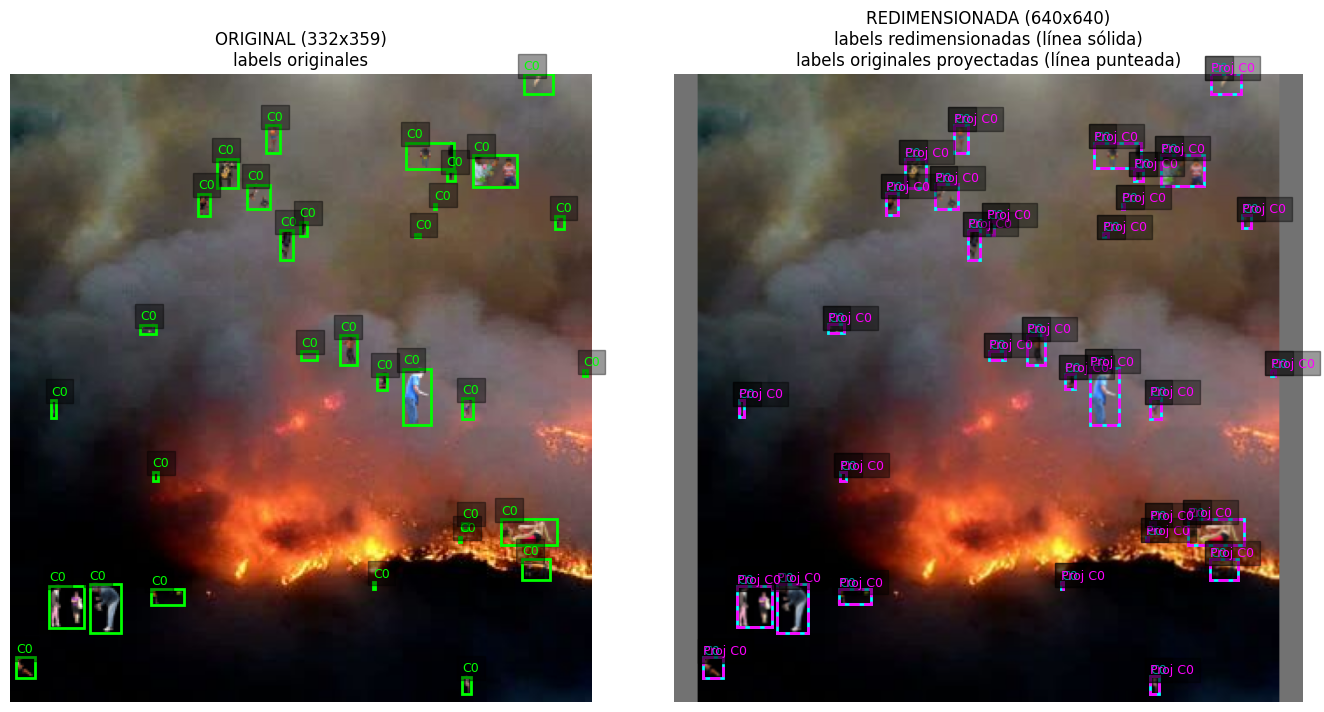

In [4]:
import os
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# =======================
# CONFIGURACIÓN
# =======================
SPLIT = "train"  # "train" | "val" | "test"
SRC_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"
RESIZED_DIR = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Redimensionado_v2"  # o tu carpeta _640_letterbox
TARGET_SIZE = 640
RESIZE_MODE = "letterbox"  # "letterbox" o "stretch"
VALID_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
SQUARE_TOL = 0.01          # ~1% de tolerancia para 1:1
SAVE_COMPARISON = False     # True = guarda imagen comparativa en disco

# =======================
# UTILIDADES
# =======================
def is_square(w, h, tol=SQUARE_TOL):
    if h == 0: return False
    return abs((w / h) - 1.0) <= tol

def load_yolo_labels(lbl_path):
    """Lee labels YOLO (cx, cy, w, h) normalizados [0..1]; devuelve lista [(cls, cx, cy, w, h)]."""
    boxes = []
    if not os.path.isfile(lbl_path):
        return boxes
    with open(lbl_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, cx, cy, bw, bh = parts
            boxes.append((int(float(cls)), float(cx), float(cy), float(bw), float(bh)))
    return boxes

def denorm_to_pixels(boxes, W, H):
    """Convierte YOLO norm -> píxeles en imagen WxH. Devuelve [(cls, x1,y1,x2,y2)]."""
    out = []
    for cls, cx, cy, bw, bh in boxes:
        cxp, cyp = cx * W, cy * H
        bwp, bhp = bw * W, bh * H
        x1 = int(round(cxp - bwp / 2))
        y1 = int(round(cyp - bhp / 2))
        x2 = int(round(cxp + bwp / 2))
        y2 = int(round(cyp + bhp / 2))
        out.append((cls, x1, y1, x2, y2))
    return out

def pixels_to_denorm(boxes_pix, W, H):
    """Convierte píxeles -> YOLO norm. boxes_pix = [(cls,x1,y1,x2,y2)]."""
    out = []
    for cls, x1, y1, x2, y2 in boxes_pix:
        bw = max(0, x2 - x1)
        bh = max(0, y2 - y1)
        cx = x1 + bw / 2
        cy = y1 + bh / 2
        out.append((cls, cx / W, cy / H, bw / W, bh / H))
    return out

def letterbox_params(orig_w, orig_h, size=640):
    scale = min(size / orig_w, size / orig_h)
    nw, nh = int(round(orig_w * scale)), int(round(orig_h * scale))
    dw = (size - nw) // 2
    dh = (size - nh) // 2
    return scale, dw, dh, nw, nh

def project_original_boxes_to_resized(orig_boxes_norm, orig_w, orig_h, size=640, mode="letterbox"):
    """Proyecta labels originales al espacio de la imagen redimensionada size x size."""
    projected = []
    if mode == "letterbox":
        scale, dw, dh, _, _ = letterbox_params(orig_w, orig_h, size)
        for cls, cx, cy, bw, bh in orig_boxes_norm:
            # a píxeles en original
            cx *= orig_w; cy *= orig_h
            bw *= orig_w; bh *= orig_h
            # escala + desplazamiento
            cx_r = (cx * scale + dw) / size
            cy_r = (cy * scale + dh) / size
            bw_r = (bw * scale) / size
            bh_r = (bh * scale) / size
            projected.append((cls, cx_r, cy_r, bw_r, bh_r))
    else:  # stretch (resize directo a size x size)
        for cls, cx, cy, bw, bh in orig_boxes_norm:
            # como todo se estira a size x size, basta mantener valores (norm ya son relativos)
            projected.append((cls, cx, cy, bw, bh))
    return projected

def iou(boxA, boxB):
    # boxes en pixeles (x1,y1,x2,y2)
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = max(0, boxA[2]-boxA[0]) * max(0, boxA[3]-boxA[1])
    areaB = max(0, boxB[2]-boxB[0]) * max(0, boxB[3]-boxB[1])
    denom = areaA + areaB - inter + 1e-9
    return inter / denom

def draw_boxes(ax, img_bgr, boxes_pix, color="lime", linestyle="-", label_prefix=""):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    for cls, x1, y1, x2, y2 in boxes_pix:
        w = x2 - x1
        h = y2 - y1
        rect = Rectangle((x1, y1), w, h, linewidth=2, edgecolor=color, facecolor="none", linestyle=linestyle)
        ax.add_patch(rect)
        ax.text(x1, y1-3, f"{label_prefix}{cls}", color=color, fontsize=9, backgroundcolor=(0,0,0,0.4))
    ax.axis("off")

# =======================
# BÚSQUEDA DE UN CASO
# =======================
src_img_dir = os.path.join(SRC_DIR, SPLIT, "images")
src_lbl_dir = os.path.join(SRC_DIR, SPLIT, "labels")
res_img_dir = os.path.join(RESIZED_DIR, SPLIT, "images")
res_lbl_dir = os.path.join(RESIZED_DIR, SPLIT, "labels")

candidate = None
for fname in os.listdir(src_img_dir):
    if not fname.lower().endswith(VALID_EXT):
        continue
    src_path = os.path.join(src_img_dir, fname)
    img = cv2.imread(src_path)
    if img is None: 
        continue
    h, w = img.shape[:2]
    if not is_square(w, h):  # no-cuadrada
        # verifica que exista la correspondiente redimensionada
        if os.path.isfile(os.path.join(res_img_dir, fname)):
            candidate = fname
            break

if candidate is None:
    raise RuntimeError("No encontré una imagen no-cuadrada con par en la carpeta redimensionada.")

print(f"🔎 Caso elegido: {candidate}")

# =======================
# CARGA DE DATOS
# =======================
# original
src_img_path = os.path.join(src_img_dir, candidate)
src_lbl_path = os.path.join(src_lbl_dir, os.path.splitext(candidate)[0] + ".txt")
src_img = cv2.imread(src_img_path)
oh, ow = src_img.shape[:2]
orig_boxes_norm = load_yolo_labels(src_lbl_path)
orig_boxes_pix  = denorm_to_pixels(orig_boxes_norm, ow, oh)

# redimensionada
res_img_path = os.path.join(res_img_dir, candidate)
res_lbl_path = os.path.join(res_lbl_dir, os.path.splitext(candidate)[0] + ".txt")
res_img = cv2.imread(res_img_path)
if res_img is None:
    raise RuntimeError("No se pudo leer la imagen redimensionada.")
rh, rw = res_img.shape[:2]

# labels guardadas en la redimensionada
res_boxes_norm = load_yolo_labels(res_lbl_path)
res_boxes_pix  = denorm_to_pixels(res_boxes_norm, rw, rh)

# proyección de labels originales -> espacio redimensionado (para comparar)
proj_boxes_norm = project_original_boxes_to_resized(
    orig_boxes_norm, ow, oh, size=TARGET_SIZE, mode=RESIZE_MODE
)
proj_boxes_pix  = denorm_to_pixels(proj_boxes_norm, rw, rh)

# =======================
# COMPARACIÓN DE IoU (aproximada)
# empareja por clase y cercanía de centros
# =======================
def center(box):
    x1,y1,x2,y2 = box
    return ((x1+x2)/2.0, (y1+y2)/2.0)

ious = []
used = set()
for i, (cls_p, x1p, y1p, x2p, y2p) in enumerate(proj_boxes_pix):
    cxp, cyp = center((x1p,y1p,x2p,y2p))
    best_j, best_d = -1, 1e9
    for j, (cls_r, x1r, y1r, x2r, y2r) in enumerate(res_boxes_pix):
        if j in used or cls_r != cls_p:
            continue
        cxr, cyr = center((x1r,y1r,x2r,y2r))
        d = (cxp - cxr)**2 + (cyp - cyr)**2
        if d < best_d:
            best_d, best_j = d, j
    if best_j >= 0:
        used.add(best_j)
        iou_val = iou((x1p,y1p,x2p,y2p), (res_boxes_pix[best_j][1], res_boxes_pix[best_j][2], res_boxes_pix[best_j][3], res_boxes_pix[best_j][4]))
        ious.append(iou_val)

mean_iou = np.mean(ious) if ious else float("nan")
print(f"📐 IoU promedio proyectado vs. redimensionado: {mean_iou:.3f} (n={len(ious)})")

# =======================
# VISUALIZACIÓN
# =======================
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].set_title(f"ORIGINAL ({ow}x{oh})\nlabels originales")
draw_boxes(axes[0], src_img, orig_boxes_pix, color="lime", linestyle="-", label_prefix="C")

axes[1].set_title(f"REDIMENSIONADA ({rw}x{rh})\nlabels redimensionadas (línea sólida)\nlabels originales proyectadas (línea punteada)")
# cajas del .txt de la carpeta redimensionada
draw_boxes(axes[1], res_img, res_boxes_pix, color="cyan", linestyle="-", label_prefix="C")
# proyección de las labels originales al espacio redimensionado
for cls, x1, y1, x2, y2 in proj_boxes_pix:
    axes[1].add_patch(Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor="magenta", facecolor="none", linestyle="--"))
    axes[1].text(x1, y1-3, f"Proj C{cls}", color="magenta", fontsize=9, backgroundcolor=(0,0,0,0.4))

plt.tight_layout()

if SAVE_COMPARISON:
    out_path = os.path.join(RESIZED_DIR, f"comparacion_{SPLIT}_{os.path.splitext(candidate)[0]}.png")
    plt.savefig(out_path, dpi=150)
    print(f"💾 Guardado: {out_path}")

plt.show()


In [1]:
# auditar_dataset_fixed.py
import os
import csv
import random
from collections import Counter

# =========================
# CONFIG (EDÍTAME AQUÍ)
# =========================
SRC_ROOT  = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Repartido"
DEST_ROOT = r"C:\Users\Usuario iTC\Desktop\Proyecto\Subconjunto Incendios Redimensionado_v2"
OUT_DIR   = r"C:\Users\Usuario iTC\Desktop\Proyecto\auditoria_dataset"
VISUALIZE = True          # True para guardar muestras con boxes
NVIZ      = 20            # cuántas imágenes por split (si VISUALIZE=True)
IMG_SIZE  = 640           # solo informativo en logs
TINY_AREA_THRESHOLD = 0.01  # umbral de "caja muy pequeña" en área relativa

VALID_IMG_EXT = (".jpg",".jpeg",".png",".bmp",".tif",".tiff")

def load_labels(lbl_path):
    """Devuelve lista de tuplas (cls, cx, cy, w, h) como floats o [] si no existe."""
    if not os.path.isfile(lbl_path):
        return []
    out = []
    with open(lbl_path, "r") as f:
        for line in f:
            s = line.strip()
            if not s:
                continue
            parts = s.split()
            if len(parts) != 5:
                out.append(("BADFMT", s, 0,0,0))  # marca formato malo
                continue
            try:
                cls = int(float(parts[0]))
                cx, cy, w, h = map(float, parts[1:])
                out.append((cls, cx, cy, w, h))
            except Exception:
                out.append(("BADFMT", s, 0,0,0))
    return out

def audit_split(root_dir, split):
    img_dir = os.path.join(root_dir, split, "images")
    lbl_dir = os.path.join(root_dir, split, "labels")
    images = [f for f in os.listdir(img_dir)] if os.path.isdir(img_dir) else []
    labels = [f for f in os.listdir(lbl_dir)] if os.path.isdir(lbl_dir) else []

    img_bases = {os.path.splitext(f)[0] for f in images if f.lower().endswith(VALID_IMG_EXT)}
    lbl_bases = {os.path.splitext(f)[0] for f in labels if f.lower().endswith(".txt")}

    missing_label = sorted(list(img_bases - lbl_bases))
    orphan_label  = sorted(list(lbl_bases - img_bases))

    per_file = []
    class_counter = Counter()
    totals = dict(total_imgs=len(img_bases), with_label=len(img_bases & lbl_bases),
                  missing_label=len(missing_label), orphan_label=len(orphan_label),
                  total_boxes=0, badfmt=0, out_of_range=0, degenerate=0, tiny=0)

    for base in sorted(img_bases):
        lbl_path = os.path.join(lbl_dir, base + ".txt")
        rows = load_labels(lbl_path)
        n = 0; badfmt=0; out_range=0; deg=0; tiny=0

        for r in rows:
            if isinstance(r[0], str) and r[0] == "BADFMT":
                badfmt += 1
                continue
            cls, cx, cy, w, h = r
            n += 1
            class_counter[cls] += 1
            # check ranges
            if not (0 <= cx <= 1 and 0 <= cy <= 1 and 0 < w <= 1 and 0 < h <= 1):
                out_range += 1
            # degenerate
            if w <= 0 or h <= 0:
                deg += 1
            # tiny area
            if (w*h) < TINY_AREA_THRESHOLD:
                tiny += 1

        per_file.append({
            "split": split,
            "file": base,
            "has_label": int(os.path.isfile(lbl_path)),
            "boxes": n,
            "bad_format_lines": badfmt,
            "out_of_range": out_range,
            "degenerate": deg,
            "tiny_area": tiny
        })
        totals["total_boxes"] += n
        totals["badfmt"]      += badfmt
        totals["out_of_range"]+= out_range
        totals["degenerate"]  += deg
        totals["tiny"]        += tiny

    return per_file, totals, class_counter, missing_label, orphan_label

def write_csv(path, rows, fieldnames):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "w", newline="") as f:
        w = csv.DictWriter(f, fieldnames=fieldnames)
        w.writeheader()
        for r in rows:
            w.writerow(r)

def summarize(tag, results):
    def pct(a,b): return (100.0*a/b) if b else 0.0
    t = results[tag]["totals"]
    print(f"\n=== RESUMEN {tag} ===")
    print(f"Imágenes totales: {t['total_imgs']}, con label: {t['with_label']} "
          f"(faltan: {t['missing_label']}), labels huérfanas: {t['orphan_label']}")
    print(f"Boxes: {t['total_boxes']}  | badfmt: {t['badfmt']}  | out_of_range: {t['out_of_range']}  "
          f"| degenerate: {t['degenerate']}  | tiny: {t['tiny']} ({pct(t['tiny'], max(1,t['total_boxes'])):.2f}%)")
    print(f"Clases (top): {results[tag]['classes'].most_common(10)}")
    if results[tag]["missing"]:
        print(f"Imágenes sin label (muestras): {results[tag]['missing'][:10]}")
    if results[tag]["orphan"]:
        print(f"Labels huérfanas (muestras): {results[tag]['orphan'][:10]}")

def main():
    os.makedirs(OUT_DIR, exist_ok=True)

    # AUDITAR SRC y DEST
    results = {}
    for tag, root in [("SRC", SRC_ROOT), ("DEST", DEST_ROOT)]:
        per_all = []
        totals_all = dict(total_imgs=0, with_label=0, missing_label=0, orphan_label=0,
                          total_boxes=0, badfmt=0, out_of_range=0, degenerate=0, tiny=0)
        class_all = Counter()
        missing_all = []; orphan_all = []
        for split in ["train","val","test"]:
            per_file, totals, class_counter, missing_label, orphan_label = audit_split(root, split)
            for k in totals_all:
                totals_all[k] += totals[k]
            class_all.update(class_counter)
            missing_all.extend([(split, m) for m in missing_label])
            orphan_all.extend([(split, o) for o in orphan_label])
            per_all.extend(per_file)
        results[tag] = dict(per=per_all, totals=totals_all, classes=class_all,
                            missing=missing_all, orphan=orphan_all)

    # Export per-file CSVs
    write_csv(os.path.join(OUT_DIR,"audit_por_archivo_SRC.csv"),
              results["SRC"]["per"],
              ["split","file","has_label","boxes","bad_format_lines","out_of_range","degenerate","tiny_area"])
    write_csv(os.path.join(OUT_DIR,"audit_por_archivo_DEST.csv"),
              results["DEST"]["per"],
              ["split","file","has_label","boxes","bad_format_lines","out_of_range","degenerate","tiny_area"])

    # Comparar conteo de cajas por archivo SRC vs DEST (para ver pérdidas)
    src_map = {(r["split"], r["file"]): r for r in results["SRC"]["per"]}
    dest_map= {(r["split"], r["file"]): r for r in results["DEST"]["per"]}
    comp_rows = []
    lost_cnt = 0
    for key in src_map:
        srow = src_map[key]
        drow = dest_map.get(key, {"boxes":0})
        diff = drow["boxes"] - srow["boxes"]
        if diff < 0:
            lost_cnt += (-diff)
        comp_rows.append({
            "split": key[0],
            "file": key[1],
            "boxes_src": srow["boxes"],
            "boxes_dest": drow["boxes"],
            "delta_boxes": diff
        })
    write_csv(os.path.join(OUT_DIR,"comparacion_boxes_por_archivo.csv"),
              comp_rows, ["split","file","boxes_src","boxes_dest","delta_boxes"])

    # Resumen consola
    summarize("SRC", results)
    summarize("DEST", results)

    print("\n=== COMPARACIÓN SRC vs DEST (conteo de cajas) ===")
    total_src = results["SRC"]["totals"]["total_boxes"]
    total_dest= results["DEST"]["totals"]["total_boxes"]
    print(f"Total boxes SRC:  {total_src}")
    print(f"Total boxes DEST: {total_dest}")
    print(f"Diferencia (DEST-SRC): {total_dest - total_src}  (cajas 'perdidas' estimadas: {lost_cnt})")

    # Guardar resumen CSV
    with open(os.path.join(OUT_DIR,"audit_resumen.csv"), "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["tag","total_imgs","with_label","missing_label","orphan_label","total_boxes","badfmt","out_of_range","degenerate","tiny"])
        for tag in ["SRC","DEST"]:
            t = results[tag]["totals"]
            w.writerow([tag, t["total_imgs"], t["with_label"], t["missing_label"], t["orphan_label"],
                        t["total_boxes"], t["badfmt"], t["out_of_range"], t["degenerate"], t["tiny"]])

    # Visualizaciones (opcional)
    if VISUALIZE:
        try:
            import cv2
            import numpy as np
            vis_dir = os.path.join(OUT_DIR, "visualizaciones")
            os.makedirs(vis_dir, exist_ok=True)

            def draw_boxes(img_path, lbl_path, out_path):
                img = cv2.imread(img_path)
                if img is None: return
                h, w = img.shape[:2]
                rows = load_labels(lbl_path)
                for r in rows:
                    if isinstance(r[0], str):  # BADFMT
                        continue
                    _, cx, cy, bw, bh = r
                    x1 = int((cx - bw/2) * w); y1 = int((cy - bh/2) * h)
                    x2 = int((cx + bw/2) * w); y2 = int((cy + bh/2) * h)
                    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
                cv2.imwrite(out_path, img)

            for tag, root in [("SRC", SRC_ROOT), ("DEST", DEST_ROOT)]:
                for split in ["train","val","test"]:
                    img_dir = os.path.join(root, split, "images")
                    lbl_dir = os.path.join(root, split, "labels")
                    imgs = [f for f in os.listdir(img_dir) if f.lower().endswith(VALID_IMG_EXT)] if os.path.isdir(img_dir) else []
                    random.shuffle(imgs)
                    for f in imgs[:NVIZ]:
                        base = os.path.splitext(f)[0]
                        draw_boxes(os.path.join(img_dir,f), os.path.join(lbl_dir, base+".txt"),
                                   os.path.join(vis_dir, f"{tag}_{split}_{base}.jpg"))
            print(f"\nVisualizaciones guardadas en: {vis_dir}")
        except Exception as e:
            print(f"(visualize) Error: {e}")

if __name__ == "__main__":
    main()



=== RESUMEN SRC ===
Imágenes totales: 2605, con label: 2605 (faltan: 0), labels huérfanas: 0
Boxes: 89000  | badfmt: 0  | out_of_range: 0  | degenerate: 0  | tiny: 87780 (98.63%)
Clases (top): [(0, 89000)]

=== RESUMEN DEST ===
Imágenes totales: 2605, con label: 2605 (faltan: 0), labels huérfanas: 0
Boxes: 89000  | badfmt: 0  | out_of_range: 0  | degenerate: 0  | tiny: 87930 (98.80%)
Clases (top): [(0, 89000)]

=== COMPARACIÓN SRC vs DEST (conteo de cajas) ===
Total boxes SRC:  89000
Total boxes DEST: 89000
Diferencia (DEST-SRC): 0  (cajas 'perdidas' estimadas: 0)

Visualizaciones guardadas en: C:\Users\Usuario iTC\Desktop\Proyecto\auditoria_dataset\visualizaciones
